In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/drive/MyDrive/data/generator_training_data.csv")

df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,Unnamed: 0,hotel_url,date,rating,title,text
0,0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2019-01-01,5.0,Xmas holiday,We went here with our kids for Xmas holiday an...
1,1,Hotel_Review-g644280-d1821178-Reviews-Agrituri...,2018-10-01,5.0,Great time in a lovely location,I had a wonderful time for a couple of nights....
2,2,Hotel_Review-g644280-d1821178-Reviews-Agrituri...,2015-03-01,3.0,Chilly on a winter's night,"When traveling to Tuscany in winter, please kn..."
3,3,Hotel_Review-g312848-d4173038-Reviews-Villa_Hu...,2018-10-01,5.0,Highly recommended,The hotel is new and very neat. Comfortable ro...
4,4,Hotel_Review-g312848-d4173038-Reviews-Villa_Hu...,2016-02-01,3.0,Quiet and modern,The hotel consists of three sites located on a...


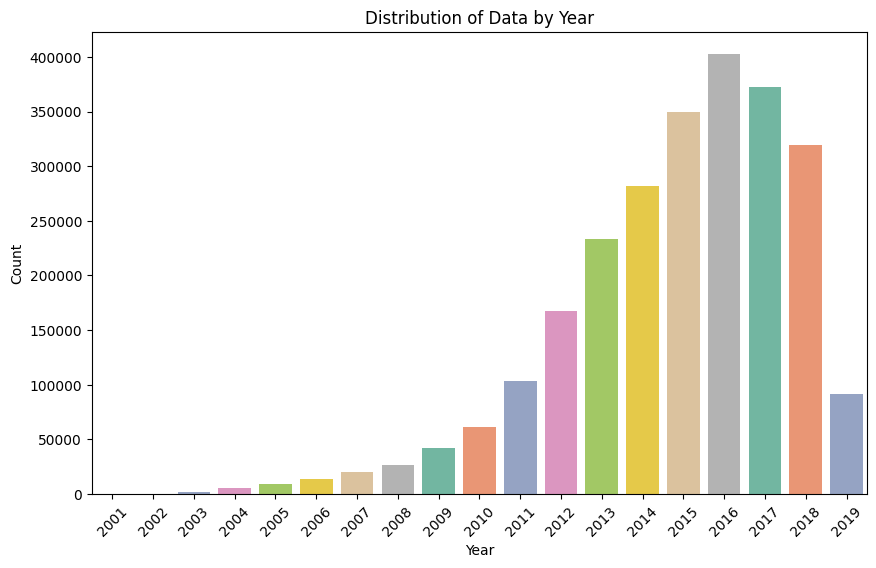

In [14]:
# Plot the distribution of data by year using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['date'].dt.year, palette='Set2')
plt.title('Distribution of Data by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

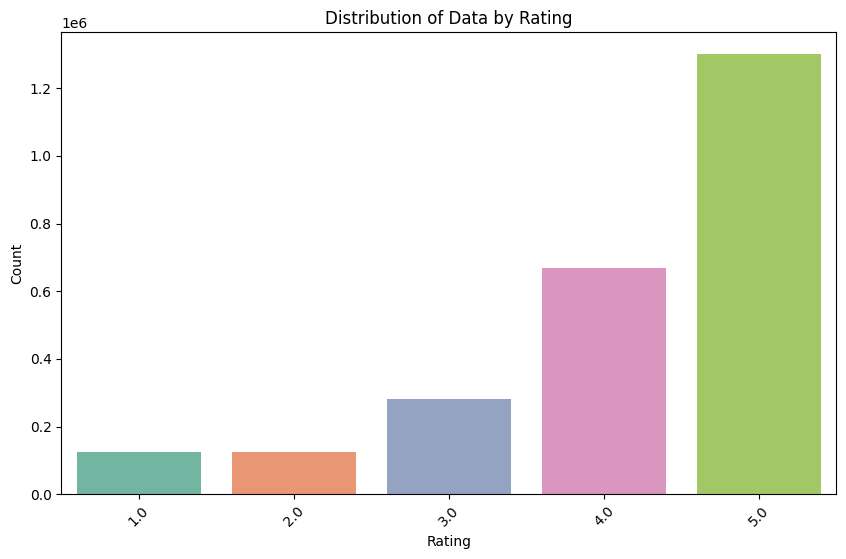

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['rating'], palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()